# Import Library

Pertama install pustaka (library) Python bernama Optuna.

Optuna adalah framework sumber terbuka yang digunakan untuk optimasi hyperparameter otomatis (Automated Hyperparameter Optimization)

In [1]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 5.5 MB/s eta 0:00:00


Setelah pustaka uptuna berhasil diinstall, selanjutnya import library yang dibutuhkan untuk proyek ini sebagai berikut:

In [4]:
import os
import zipfile
import pandas as pd
import numpy as np
import tensorflow as tf
import optuna
import zipfile
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tensorflow import keras
from tensorflow.keras import layers
from google.colab import files

Selanjutnya extrac file dataset yang sudah di unggah di google colab dengan cara berikut

In [5]:
# Nama file ZIP
zip_path = "archive.zip"

# Ekstrak langsung di direktori saat ini
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall()

print("File berhasil diekstrak di direktori saat ini.")

File berhasil diekstrak di direktori saat ini.


Ada pesan menunjukkan file zip berhasil di ekstrak dan selanjutnya ke proses data understanding

# Data Understanding

Dataset ini terdiri dari tiga file CSV, yaitu Books.csv, Ratings.csv, dan Users.csv.

Langkah berikutnya adalah membuka masing-masing file tersebut menggunakan library pandas untuk meninjau isinya.

1. Books.csv

In [6]:
# Load dataset
dfbooks = pd.read_csv('/content/Books.csv')
dfratings = pd.read_csv('/content/Ratings.csv')
dfusers = pd.read_csv('/content/Users.csv')

<ipython-input-6-1d1050e76b64>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  dfbooks = pd.read_csv('/content/Books.csv')


Langkah selanjutnya, melihat isi dari dataset buku, dengan memanggil variabelnya

In [7]:
dfbooks

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


Selanjutnya perintah untuk menampilkan ringkasan informasi tentang sebuah DataFrame bernama dfbooks, termasuk jumlah entri, tipe data kolom, dan penggunaan memori.

In [8]:
dfbooks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


*
Berdasarkan output di atas, file Books.csv menyimpan informasi mengenai buku dengan total 271.360 entri dan terdiri dari 8 kolom, yaitu:

- ISBN: menyajikan kode unik ISBN untuk setiap buku
- Book-Title: memuat judul buku
- Book-Author: berisi nama penulis buku
- Year-Of-Publication: menunjukkan tahun buku diterbitkan
- Publisher: nama penerbit buku
- Image-URL-S: tautan ke gambar buku berukuran kecil
- Image-URL-M: tautan ke gambar berukuran sedang
- Image-URL-L: tautan ke gambar berukuran besar

2. Ratings.csv

Selanjutnya cara untuk melihat isi dataset rating

In [9]:
dfratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


Untuk mengetahui distribusi frekuensi dari setiap nilai rating yang diberikan pengguna, dilakukan pengelompokan data berdasarkan kolom Book-Rating. Kemudian, jumlah baris untuk setiap nilai rating dihitung.

In [10]:
dfratings.groupby('Book-Rating').count()

,User-ID,ISBN
Book-Rating,,
0,716109,716109
1,1770,1770
2,2759,2759
3,5996,5996
4,8904,8904
5,50974,50974
6,36924,36924
7,76457,76457
8,103736,103736


*Hasilnya menunjukkan berapa kali masing-masing nilai rating (dari 0 hingga 10) diberikan, yang direpresentasikan melalui jumlah entri pada kolom User-ID dan ISBN.

Setelah mengetahui jumlah masing-masing nilai rating yang diberikan oleh pengguna, langkah selanjutnya adalah memvisualisasikannya dalam bentuk grafik batang. Visualisasi ini bertujuan untuk melihat distribusi rating buku secara lebih jelas dan mudah dipahami. Grafik akan menampilkan nilai rating pada sumbu X dan jumlah buku yang menerima rating tersebut pada sumbu Y.

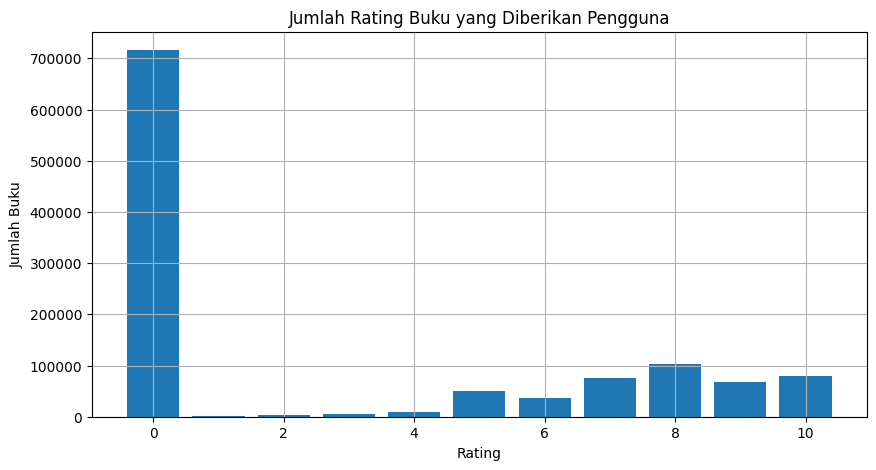

In [11]:
rating_counter = dfratings.groupby('Book-Rating').count()
plt.figure(figsize=(10,5))
plt.title('Jumlah Rating Buku yang Diberikan Pengguna')
plt.xlabel('Rating')
plt.ylabel('Jumlah Buku')
plt.bar(rating_counter.index, rating_counter['ISBN'])
plt.grid(True)
plt.show()

*Dari visualisasi, terlihat jelas bahwa sebagian besar buku memiliki rating 0, yang mengindikasikan kemungkinan besar rating 0 ini adalah rating yang tidak diberikan (atau mungkin rating default/missing value) karena jumlahnya sangat jauh lebih tinggi dibandingkan rating lainnya. Rating 8, 9, dan 10 memiliki jumlah buku yang cukup signifikan, sementara rating antara 1 hingga 5 memiliki jumlah yang sangat rendah.

Selanjutnya perintah untuk menampilkan ringkasan informasi tentang sebuah DataFrame bernama dfratings, termasuk jumlah entri, tipe data kolom, dan penggunaan memori.

In [12]:
dfratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


Perintah selanjutnya menampilkan ringkasan statistik deskriptif dari data rating dalam format angka desimal yang mudah dibaca.

In [13]:
dfratings.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,User-ID,Book-Rating
count,1149780.000000,1149780.000000
mean,140386.395126,2.866950
std,80562.277718,3.854184
min,2.000000,0.000000
25%,70345.000000,0.000000
50%,141010.000000,0.000000
75%,211028.000000,7.000000
max,278854.000000,10.000000


*Berdasarkan output sebelumnya, file Ratings.csv berisi data penilaian buku dari para pengguna. Dataset ini memiliki total 1.149.780 baris dan terdiri dari 3 kolom, yaitu:

- User-ID: kode identifikasi unik untuk setiap pengguna
- ISBN: kode ISBN buku yang telah diberikan nilai oleh pengguna
-Book-Rating: skor rating yang diberikan oleh pengguna dengan rentang nilai antara 0 sampai 10

3. Users.csv

Berikut adalah melihat isi dari datset user

In [14]:
dfusers

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


Selanjutnya perintah untuk menampilkan ringkasan informasi tentang sebuah DataFrame bernama dfusers, termasuk jumlah entri, tipe data kolom, dan penggunaan memori.

In [15]:
dfusers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


Langkah selanjutnya menampilkan ringkasan statistik deskriptif dari data pengguna agar kita dapat memahami distribusi dan karakteristik kolom numeriknya.

In [16]:
dfusers.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


*Berdasarkan output sebelumnya, file Users.csv berisi 278858 baris dan memiliki 3 kolom, yaitu :

- User-ID : berisi ID unik pengguna
- Location : berisi data lokasi pengguna
- Age : berisi data usia pengguna

# Data Preparation

Sebelum memulai proses pemodelan, penting untuk memastikan data sudah siap dan bersih. Tahap data preparation menjadi fondasi utama agar analisis dan pemodelan berjalan optimal. Berikut ini adalah rangkaian langkah yang kami lakukan dalam menyiapkan data agar siap digunakan.

**Handling Imbalanced Data**

Sebelumnya telah diketahui bahwa data rating tidak seimbang, untuk itu pada tahap ini saya mencoba untuk menghapus data rating 0.

In [17]:
dfratings.drop(dfratings[dfratings["Book-Rating"] == 0].index, inplace=True)

Berikut ini adalah jumlah data setelah di-drop

In [18]:
dfratings.shape

(433671, 3)

Cek kembali dfratings setelah di drop

In [19]:
dfratings

,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6
...,...,...,...
1149773,276704,0806917695,5
1149775,276704,1563526298,9
1149777,276709,0515107662,10
1149778,276721,0590442449,10


Kode berikut akan membuat grafik batang untuk memperlihatkan berapa banyak buku yang mendapatkan setiap nilai rating dari pengguna.



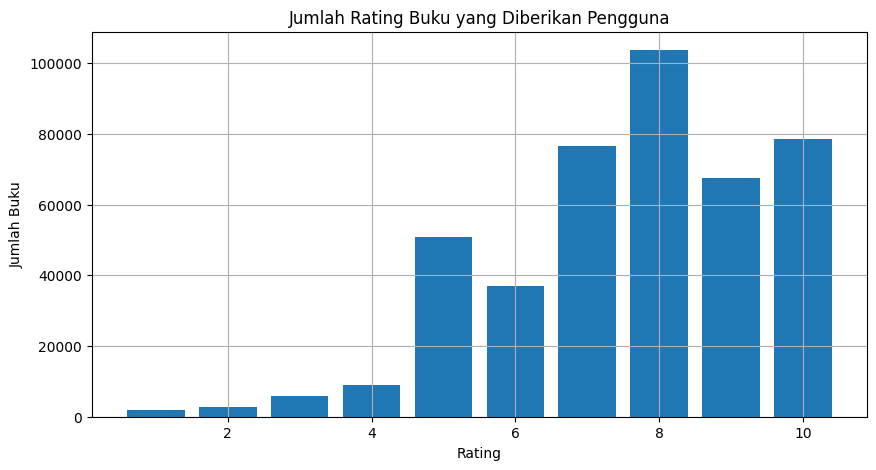

In [20]:
rating_counter = dfratings.groupby('Book-Rating').count()
plt.figure(figsize=(10,5))
plt.title('Jumlah Rating Buku yang Diberikan Pengguna')
plt.xlabel('Rating')
plt.ylabel('Jumlah Buku')
plt.bar(rating_counter.index, rating_counter['ISBN'])
plt.grid(True)
plt.show()

*Gambar kedua ini menampilkan histogram distribusi rating buku setelah menghapus rating bernilai 0. Berbeda dari visualisasi sebelumnya yang didominasi oleh rating 0 (kemungkinan data kosong), grafik ini kini menyoroti bagaimana pengguna sesungguhnya memberi rating. Terlihat jelas bahwa rating 8 merupakan yang paling banyak diberikan, diikuti oleh rating 7 dan 10. Sebaliknya, rating di bawah 5, khususnya 1 hingga 4, sangat jarang muncul, menunjukkan bahwa sebagian besar rating positif atau menengah yang diberikan pengguna.

**Encoding Data**

Encoding dilakukan untuk mengubah User-ID dan ISBN menjadi angka indeks dalam bentuk bilangan bulat.

In [21]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = dfratings['User-ID'].unique().tolist()

# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}

# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

In [23]:
# Mengubah ISBN menjadi list tanpa nilai yang sama
isbn_list = dfratings['ISBN'].unique().tolist()

# Melakukan encoding ISBN
isbn_to_isbn_encoded = {x: i for i, x in enumerate(isbn_list)}

# Melakukan proses encoding angka ke ISBN
isbn_encoded_to_isbn = {i: x for i, x in enumerate(isbn_list)}

Selanjutnya itu hasil dari encoding akan dimapping ke dataframe dfratings

In [24]:
# Mapping userID ke dataframe user
dfratings['user'] = dfratings['User-ID'].map(user_to_user_encoded)

In [25]:
# Mapping userID ke dataframe user
dfratings['book'] = dfratings['ISBN'].map(isbn_to_isbn_encoded)

Cek dfratings setelah encoding

In [26]:
dfratings

,User-ID,ISBN,Book-Rating,user,book
1,276726,0155061224,5,0,0
3,276729,052165615X,3,1,1
4,276729,0521795028,6,1,2
6,276736,3257224281,8,2,3
7,276737,0600570967,6,3,4
...,...,...,...,...,...
1149773,276704,0806917695,5,77801,185971
1149775,276704,1563526298,9,77801,121200
1149777,276709,0515107662,10,77802,23986
1149778,276721,0590442449,10,77803,151038


Cek juga ratings.info() setelah endocing

In [27]:
dfratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 433671 entries, 1 to 1149779
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   User-ID      433671 non-null  int64 
 1   ISBN         433671 non-null  object
 2   Book-Rating  433671 non-null  int64 
 3   user         433671 non-null  int64 
 4   book         433671 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 19.9+ MB


*Setelah encoding, data memiliki 433.671 baris dan 5 kolom, dengan kolom user dan book sebagai representasi angka dari User-ID dan ISBN untuk memudahkan pemrosesan data.

**Randomize Dataset**

Langkah berikutnya adalah melakukan pengacakan data agar distribusinya menjadi acak dan lebih merata, sehingga analisis dan pemodelan dapat berjalan dengan lebih baik.

In [28]:
df = dfratings.sample(frac=1, random_state=42)
df

,User-ID,ISBN,Book-Rating,user,book
144846,32440,0380018179,8,9713,1013
211411,49144,8422641127,5,14390,54663
647520,156424,3442453844,7,44370,127953
30124,7125,0060586125,8,2587,10359
1052982,251606,0316789844,8,70897,7053
...,...,...,...,...,...
658592,159834,0441132456,7,45235,70428
958724,231613,0747542333,5,65186,33018
335707,79923,0440206154,8,22993,6822
373697,89610,8880891960,5,25753,84887


**Data Standardization and Splitting**

Setelah data diacak secara acak, dataset kemudian dibagi menjadi dua bagian, yakni 80% untuk pelatihan model dan 20% untuk validasi.

Selain itu, nilai rating yang awalnya berada dalam skala 0 sampai 10, diubah menjadi rentang 0 sampai 1 melalui proses standarisasi agar proses pelatihan model menjadi lebih efektif dan stabil.

In [29]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah resto
num_isbn = len(isbn_encoded_to_isbn)
print(num_isbn)

# Mengubah rating menjadi nilai float
df['Book-Rating'] = df['Book-Rating'].values.astype(np.float32)

# Nilai minimum Book-Rating
min_rating = min(df['Book-Rating'])

# Nilai maksimal Book-Rating
max_rating = max(df['Book-Rating'])

print('Number of User: {}, Number of ISBN: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_isbn, min_rating, max_rating
))

77805
185973
Number of User: 77805, Number of ISBN: 185973, Min Rating: 1.0, Max Rating: 10.0


*Output ini menunjukkan bahwa dataset berisi 77.805 pengguna unik, 185.973 buku berbeda, dengan nilai rating mulai dari 1 hingga 10.

Selanjutnya untuk menyiapkan data fitur dan target dengan melakukan normalisasi rating serta membagi dataset menjadi data pelatihan dan validasi agar siap digunakan dalam proses pemodelan sebagai berikut:

In [30]:
# Membuat variabel x untuk mencocokkan data user dan book menjadi satu value
x = df[['user', 'book']].values

# Membuat variabel y untuk membuat rating dari hasil
y = df['Book-Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[  9713   1013]
 [ 14390  54663]
 [ 44370 127953]
 ...
 [ 22993   6822]
 [ 25753  84887]
 [ 21414  43793]] [0.77777778 0.44444444 0.66666667 ... 0.77777778 0.44444444 0.77777778]


# Modelling

**Membuat Kelas RecommenderNet**

Selanjutnya mendefinisikan model rekomendasi berbasis embedding yang menggabungkan representasi pengguna dan buku untuk memprediksi rating dalam rentang 0 hingga 1 menggunakan fungsi aktivasi sigmoid.

In [31]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_isbn, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_isbn = num_isbn
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.book_embedding = layers.Embedding( # layer embeddings book
        num_isbn,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.book_bias = layers.Embedding(num_isbn, 1) # layer embedding book bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    book_vector = self.book_embedding(inputs[:, 1]) # memanggil layer embedding 3
    book_bias = self.book_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_book = tf.tensordot(user_vector, book_vector, 2)

    x = dot_user_book + user_bias + book_bias

    return tf.nn.sigmoid(x) # activation sigmoid

**Hyperparameter Tuning**

Untuk memperoleh performa model yang maksimal, proyek ini memanfaatkan library Optuna sebagai alat otomatis dalam mencari nilai hyperparameter terbaik, khususnya untuk menentukan ukuran embedding (embedding_size) yang optimal.

In [33]:
def objective(trial):
    tf.keras.backend.clear_session()
    model = RecommenderNet(num_users=num_users, num_isbn=num_isbn, embedding_size=trial.suggest_int('embedding_size', 1, 15))

    # model compile
    model.compile(
        loss = tf.keras.losses.BinaryCrossentropy(),
        optimizer = keras.optimizers.Adam(learning_rate=0.001),
        metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )

    model.fit(
        x = x_train,
        y = y_train,
        batch_size=200,
        epochs = 1,
        validation_data = (x_val, y_val)
    )

    y_pred= model.predict(x_val)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_val, y_pred)
    # Calculate Root Mean Squared Error
    rmse = np.sqrt(mse)

    return rmse

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=15, timeout=500)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2025-05-27 10:10:16,369] A new study created in memory with name: no-name-f5de0c90-94d5-464c-ac5a-0a3e7ede0ae3


1735/1735 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - loss: 0.6654 - root_mean_squared_error: 0.2874 - val_loss: 0.5726 - val_root_mean_squared_error: 0.1973
2711/2711 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


[I 2025-05-27 10:11:05,008] Trial 0 finished with value: 0.252762586833447 and parameters: {'embedding_size': 3}. Best is trial 0 with value: 0.252762586833447.


1735/1735 ━━━━━━━━━━━━━━━━━━━━ 93s 52ms/step - loss: 0.6580 - root_mean_squared_error: 0.2806 - val_loss: 0.5739 - val_root_mean_squared_error: 0.1975
2711/2711 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


[I 2025-05-27 10:12:43,096] Trial 1 finished with value: 0.25739393003581557 and parameters: {'embedding_size': 13}. Best is trial 0 with value: 0.252762586833447.


1735/1735 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - loss: 0.6727 - root_mean_squared_error: 0.2933 - val_loss: 0.5786 - val_root_mean_squared_error: 0.2036
2711/2711 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


[I 2025-05-27 10:13:06,220] Trial 2 finished with value: 0.2521371268520051 and parameters: {'embedding_size': 1}. Best is trial 2 with value: 0.2521371268520051.


1735/1735 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - loss: 0.6596 - root_mean_squared_error: 0.2825 - val_loss: 0.5737 - val_root_mean_squared_error: 0.1974
2711/2711 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


[I 2025-05-27 10:14:40,871] Trial 3 finished with value: 0.2566471779044923 and parameters: {'embedding_size': 12}. Best is trial 2 with value: 0.2521371268520051.


1735/1735 ━━━━━━━━━━━━━━━━━━━━ 93s 52ms/step - loss: 0.6601 - root_mean_squared_error: 0.2823 - val_loss: 0.5737 - val_root_mean_squared_error: 0.1973
2711/2711 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


[I 2025-05-27 10:16:19,226] Trial 4 finished with value: 0.25553290763327174 and parameters: {'embedding_size': 13}. Best is trial 2 with value: 0.2521371268520051.


1735/1735 ━━━━━━━━━━━━━━━━━━━━ 60s 33ms/step - loss: 0.6657 - root_mean_squared_error: 0.2874 - val_loss: 0.5734 - val_root_mean_squared_error: 0.1974
2711/2711 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


[I 2025-05-27 10:17:23,963] Trial 5 finished with value: 0.2529728612309978 and parameters: {'embedding_size': 8}. Best is trial 2 with value: 0.2521371268520051.


1735/1735 ━━━━━━━━━━━━━━━━━━━━ 81s 46ms/step - loss: 0.6602 - root_mean_squared_error: 0.2825 - val_loss: 0.5732 - val_root_mean_squared_error: 0.1969
2711/2711 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


[I 2025-05-27 10:18:53,563] Trial 6 finished with value: 0.25534516491968745 and parameters: {'embedding_size': 12}. Best is trial 2 with value: 0.2521371268520051.


Number of finished trials: 7
Best trial:
  Value: 0.2521371268520051
  Params: 
    embedding_size: 1


Berikut untuk membersihkan sesi sebelumnya dan menginisialisasi model rekomendasi dengan nilai hyperparameter terbaik sebelum dilakukan proses pelatihan.

In [34]:
tf.keras.backend.clear_session()

# Menerapkan nilai parameter paling optimal dari optuna
BEST_EMBEDDING_SIZE = 1

model = RecommenderNet(num_users, num_isbn, BEST_EMBEDDING_SIZE)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

**Melatih Model**

Selanjutnya, dilakukan proses pelatihan model menggunakan data yang telah dibagi sebelumnya untuk mempelajari pola interaksi antara pengguna dan buku.

In [35]:
# Memulai training

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size=64,
    epochs = 10,
    validation_data = (x_val, y_val)
)

Epoch 1/10
5421/5421 ━━━━━━━━━━━━━━━━━━━━ 52s 9ms/step - loss: 0.6666 - root_mean_squared_error: 0.2885 - val_loss: 0.6092 - val_root_mean_squared_error: 0.2362
Epoch 2/10
5421/5421 ━━━━━━━━━━━━━━━━━━━━ 80s 9ms/step - loss: 0.5778 - root_mean_squared_error: 0.2039 - val_loss: 0.5711 - val_root_mean_squared_error: 0.1966
Epoch 3/10
5421/5421 ━━━━━━━━━━━━━━━━━━━━ 80s 9ms/step - loss: 0.5558 - root_mean_squared_error: 0.1800 - val_loss: 0.5677 - val_root_mean_squared_error: 0.1934
Epoch 4/10
5421/5421 ━━━━━━━━━━━━━━━━━━━━ 47s 9ms/step - loss: 0.5476 - root_mean_squared_error: 0.1711 - val_loss: 0.5636 - val_root_mean_squared_error: 0.1893
Epoch 5/10
5421/5421 ━━━━━━━━━━━━━━━━━━━━ 85s 9ms/step - loss: 0.5427 - root_mean_squared_error: 0.1652 - val_loss: 0.5617 - val_root_mean_squared_error: 0.1875
Epoch 6/10
5421/5421 ━━━━━━━━━━━━━━━━━━━━ 48s 9ms/step - loss: 0.5385 - root_mean_squared_error: 0.1607 - val_loss: 0.5608 - val_root_mean_squared_error: 0.1866
Epoch 7/10
5421/5421 ━━━━━━━━━━━━━

# Evaluasi

Langkah selanjutnya adalah mengevaluasi performa model dengan memvisualisasikan nilai Root Mean Squared Error (RMSE) pada data pelatihan dan validasi selama proses training.

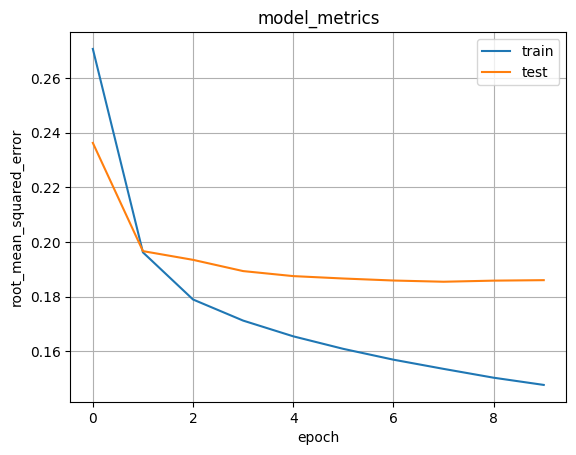

In [36]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.grid(True)
plt.show()

*Berdasarkan hasil evaluasi, model yang dikembangkan berhasil mencapai nilai Root Mean Squared Error (RMSE) sebesar 0.185, yang menunjukkan bahwa prediksi rating yang dihasilkan cukup akurat dan mendekati nilai sebenarnya.

**Mendapatkan Rekomendasi**

Langkah selanjutnya adalah menghasilkan rekomendasi buku untuk pengguna secara acak berdasarkan model yang telah dilatih, dengan memprediksi rating tertinggi dari buku-buku yang belum pernah dibaca oleh pengguna tersebut.

In [38]:
books_df = dfbooks
df = pd.read_csv('/content/Ratings.csv')

# Mengambil sample user
user_id = df['User-ID'].sample(1).iloc[0]
book_read_by_user = df[df['User-ID'] == user_id]

# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html
book_not_read = books_df[~books_df['ISBN'].isin(book_read_by_user.ISBN.values)]['ISBN']
book_not_read = list(
    set(book_not_read)
    .intersection(set(isbn_to_isbn_encoded.keys()))
)

book_not_read = [[isbn_to_isbn_encoded.get(x)] for x in book_not_read]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_not_read), book_not_read)
)

Berikut adalah proses untuk menampilkan daftar buku dengan rating tertinggi yang telah dibaca oleh pengguna, sekaligus menghasilkan 10 rekomendasi buku terbaik yang belum pernah dibaca berdasarkan prediksi model.

In [41]:
# Prediksi rating buku yang belum dibaca oleh user
dfratings = model.predict(user_book_array).flatten()

# Mengambil 10 buku dengan prediksi rating tertinggi
top_ratings_indices = dfratings.argsort()[-10:][::-1]
recommended_book_isbns = [
    isbn_encoded_to_isbn.get(book_not_read[x][0]) for x in top_ratings_indices
]

print(f"\n📚 Showing recommendations for user ID: {user_id}")
print("=" * 40)

# Menampilkan buku dengan rating tertinggi dari user
print("\n⭐ Buku dengan rating tertinggi dari user:")
print("-" * 40)
top_book_user = (
    book_read_by_user.sort_values(by='Book-Rating', ascending=False)
    .head(5)
    .ISBN.values
)

book_df_rows = books_df[books_df['ISBN'].isin(top_book_user)]
for row in book_df_rows.itertuples():
    # Access 'Book-Title' (index 1) and 'Book-Author' (index 2) by position
    print(f"📖 {row[1]} — {row[2]}")

# Menampilkan 10 rekomendasi buku teratas
print("\n🎯 Top 10 rekomendasi buku untuk user:")
print("-" * 40)
recommended_books = books_df[books_df['ISBN'].isin(recommended_book_isbns)]
for i, row in enumerate(recommended_books.itertuples(), start=1):
    # Access 'Book-Title' (index 1) and 'Book-Author' (index 2) by position
    print(f"{i}. {row[1]} — {row[2]}")

4616/4616 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step

📚 Showing recommendations for user ID: 235105

⭐ Buku dengan rating tertinggi dari user:
----------------------------------------
📖 1586481843 — Franklin Delano Roosevelt: Champion of Freedom
📖 0060083956 — Mr. Paradise:  A Novel
📖 0375414827 — The Language Police:  How Pressure Groups Restrict What Students Learn
📖 0312288476 — In the Bleak Midwinter
📖 0060528052 — Death's Jest-Book

🎯 Top 10 rekomendasi buku untuk user:
----------------------------------------
1. 0345339738 — The Return of the King (The Lord of the Rings, Part 3)
2. 0618002243 — The Return of the King (The Lord of The Rings, Part 3)
3. 0618002235 — The Two Towers (The Lord of the Rings, Part 2)
4. 0060256656 — The Giving Tree
5. 0836218787 — Scientific Progress Goes 'Boink':  A Calvin and Hobbes Collection
6. 0836220889 — Calvin and Hobbes
7. 0811824829 — 52 Deck Series: 52 Ways to Celebrate Friendship
8. 0743454529 — My Sister's Keeper : A Novel (Picoult, Jodi)
9. 08362133

Berdasarkan hasil output tersebut, dapat disimpulkan bahwa sistem rekomendasi berhasil memberikan saran buku yang relevan dan beragam untuk pengguna dengan ID 235105. Sistem menampilkan 5 buku yang sebelumnya telah diberi rating tinggi oleh pengguna, menunjukkan preferensinya terhadap novel, biografi, dan literatur pendidikan.

Sementara itu, 10 rekomendasi buku yang diberikan sistem mencakup berbagai genre populer seperti fantasi (The Lord of the Rings, Harry Potter), fiksi kontemporer (My Sister's Keeper), hingga koleksi komik dan buku inspiratif (Calvin and Hobbes, The Giving Tree). Hal ini menunjukkan bahwa model berhasil mempelajari pola kesukaan pengguna dan menyarankan buku-buku dengan potensi rating tinggi yang belum dibaca.